subhalo_127000000000002
subhalo_127000000000003
subhalo_127000000000004
subhalo_127000000000006
subhalo_127000000000007
subhalo_127000000000009
subhalo_127000000000012
subhalo_127000000000011
subhalo_127000000000014
subhalo_127000000000020
subhalo_127000000000021
subhalo_127000000000023


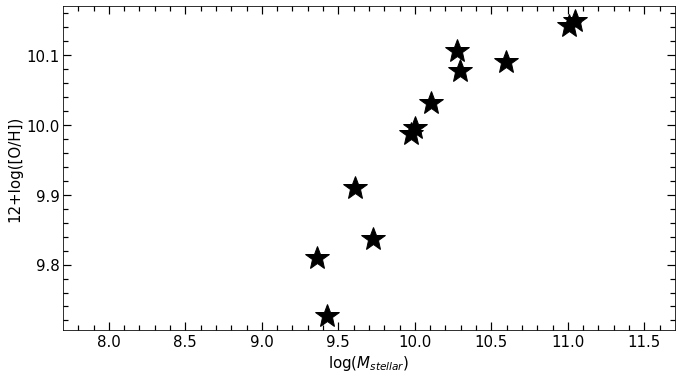

In [7]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines
import matplotlib as mpl
import metallicity_profile as metp

shID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/z/omarioni/gradients/_simulations/snap_127/'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.subplots_adjust(bottom=0.15, left =0.12, right = 0.97, top = 0.9, wspace=0., hspace= 0)

for j in range(12):

    snap = h5py.File(path + 'subhalo_'+str('%d'%shID[j])+'.h5py', 'r')

    print('subhalo_'+str('%d'%shID[j]))

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Rvir = snap['/R200'][()]
    
    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
        
    met  = snap['/Str/Metallicity'][()]
    
    xstr = pstr[:,0]*aexp/h
    ystr = pstr[:,1]*aexp/h
    zstr = pstr[:,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
    
    mstr = mstr*1e10/h

    rgal = 0.15*Rvir*aexp/h
    
    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]

    met_ = met[limit]
    
    OH = met_[:,4]/met_[:,0]
    
    mask, = np.where((OH>0))
    
    metallicity = np.median(OH[mask])
    
    ax.plot(np.log10(Mgal),12+np.log10(metallicity) , 'k*', ms=25)

ax.minorticks_on()
ax.tick_params( labelsize=15)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
ax.set_xlabel(r'log($M_{stellar}$)',fontsize=15)
ax.set_ylabel('12+log([O/H])',fontsize=15)
ax.set_xlim(7.7,11.7)
# ax.set_ylim(8,9.5)

plt.show()

fig.savefig('../_imagenes/Tremonti.png',dpi=100)